## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
# importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [ ]:
X.head()

In [ ]:
y.head()

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
#Separando os dados em treino e teste em uma faixa de 70% e 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [4]:
#criando e treinando a melhor arvore do exercicio anterior

regr = DecisionTreeRegressor(max_depth=8)

regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [5]:
#calculando o MSE

mse = mean_squared_error(y_test, regr.predict(X_test))

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr.get_depth(),mse).replace(".",","))

O MSE da árvore com profundidade=8 é: 14,88


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [7]:
#executando o metodo cost_complexity_pruning_path

path = regr.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.02767763e-14, 1.41242938e-05, 1.27118644e-04,
        1.69491525e-04, 3.53107345e-04, 5.08474576e-04, 5.08474576e-04,
        6.92090395e-04, 7.95668550e-04, 9.03954802e-04, 9.03954802e-04,
        1.14406780e-03, 1.36064030e-03, 1.36064030e-03, 1.41242938e-03,
        1.44632768e-03, 1.69962335e-03, 1.70903955e-03, 1.70903955e-03,
        1.70903955e-03, 2.27871940e-03, 2.38700565e-03, 2.76836158e-03,
        3.17796610e-03, 3.18267420e-03, 3.43220339e-03, 4.57627119e-03,
        4.77401130e-03, 4.98116761e-03, 5.76741996e-03, 6.83615819e-03,
        7.16101695e-03, 7.53295669e-03, 7.53295669e-03, 9.98964218e-03,
        1.09830508e-02, 1.22372881e-02, 1.93361582e-02, 1.98917137e-02,
        1.98917137e-02, 2.03474576e-02, 2.13101964e-02, 2.17702448e-02,
        2.37570621e-02, 2.53258004e-02, 2.71939736e-02, 2.95697523e-02,
        3.61581921e-02, 4.07203390e-02, 4.18714689e-02, 4.40748588e-02,
        4.41831450e-02, 4.58898305e-02, 4.68230611

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
#determinado as variaveis alphas e impurities

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [11]:
#Calculando o MSE para cada arvore da lista (Treino e Teste)

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

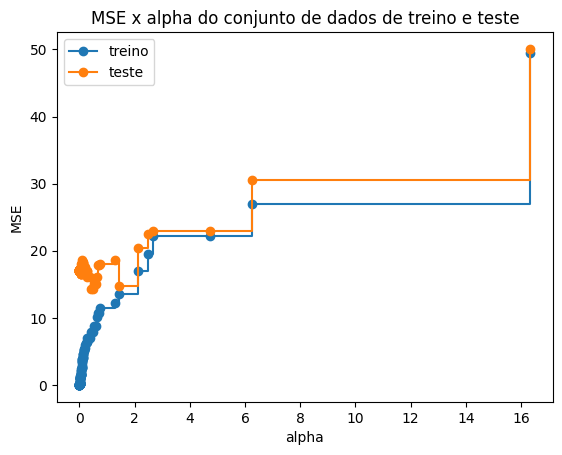

In [12]:
#exibe o grafico do MSE pelo alpha dos conjuntos de dados de treino e de teste

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [14]:
#Olhando para o grafico a arvore com menor MSE se encontra aproximadamente no alpha = 2.

arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2)
arvore_final.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=2, random_state=0)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [16]:
print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-Quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 4
R-Quadrado na base de testes: 0.76
MSE na base de testes: 15.39


### 7. Visualize esta árvore.

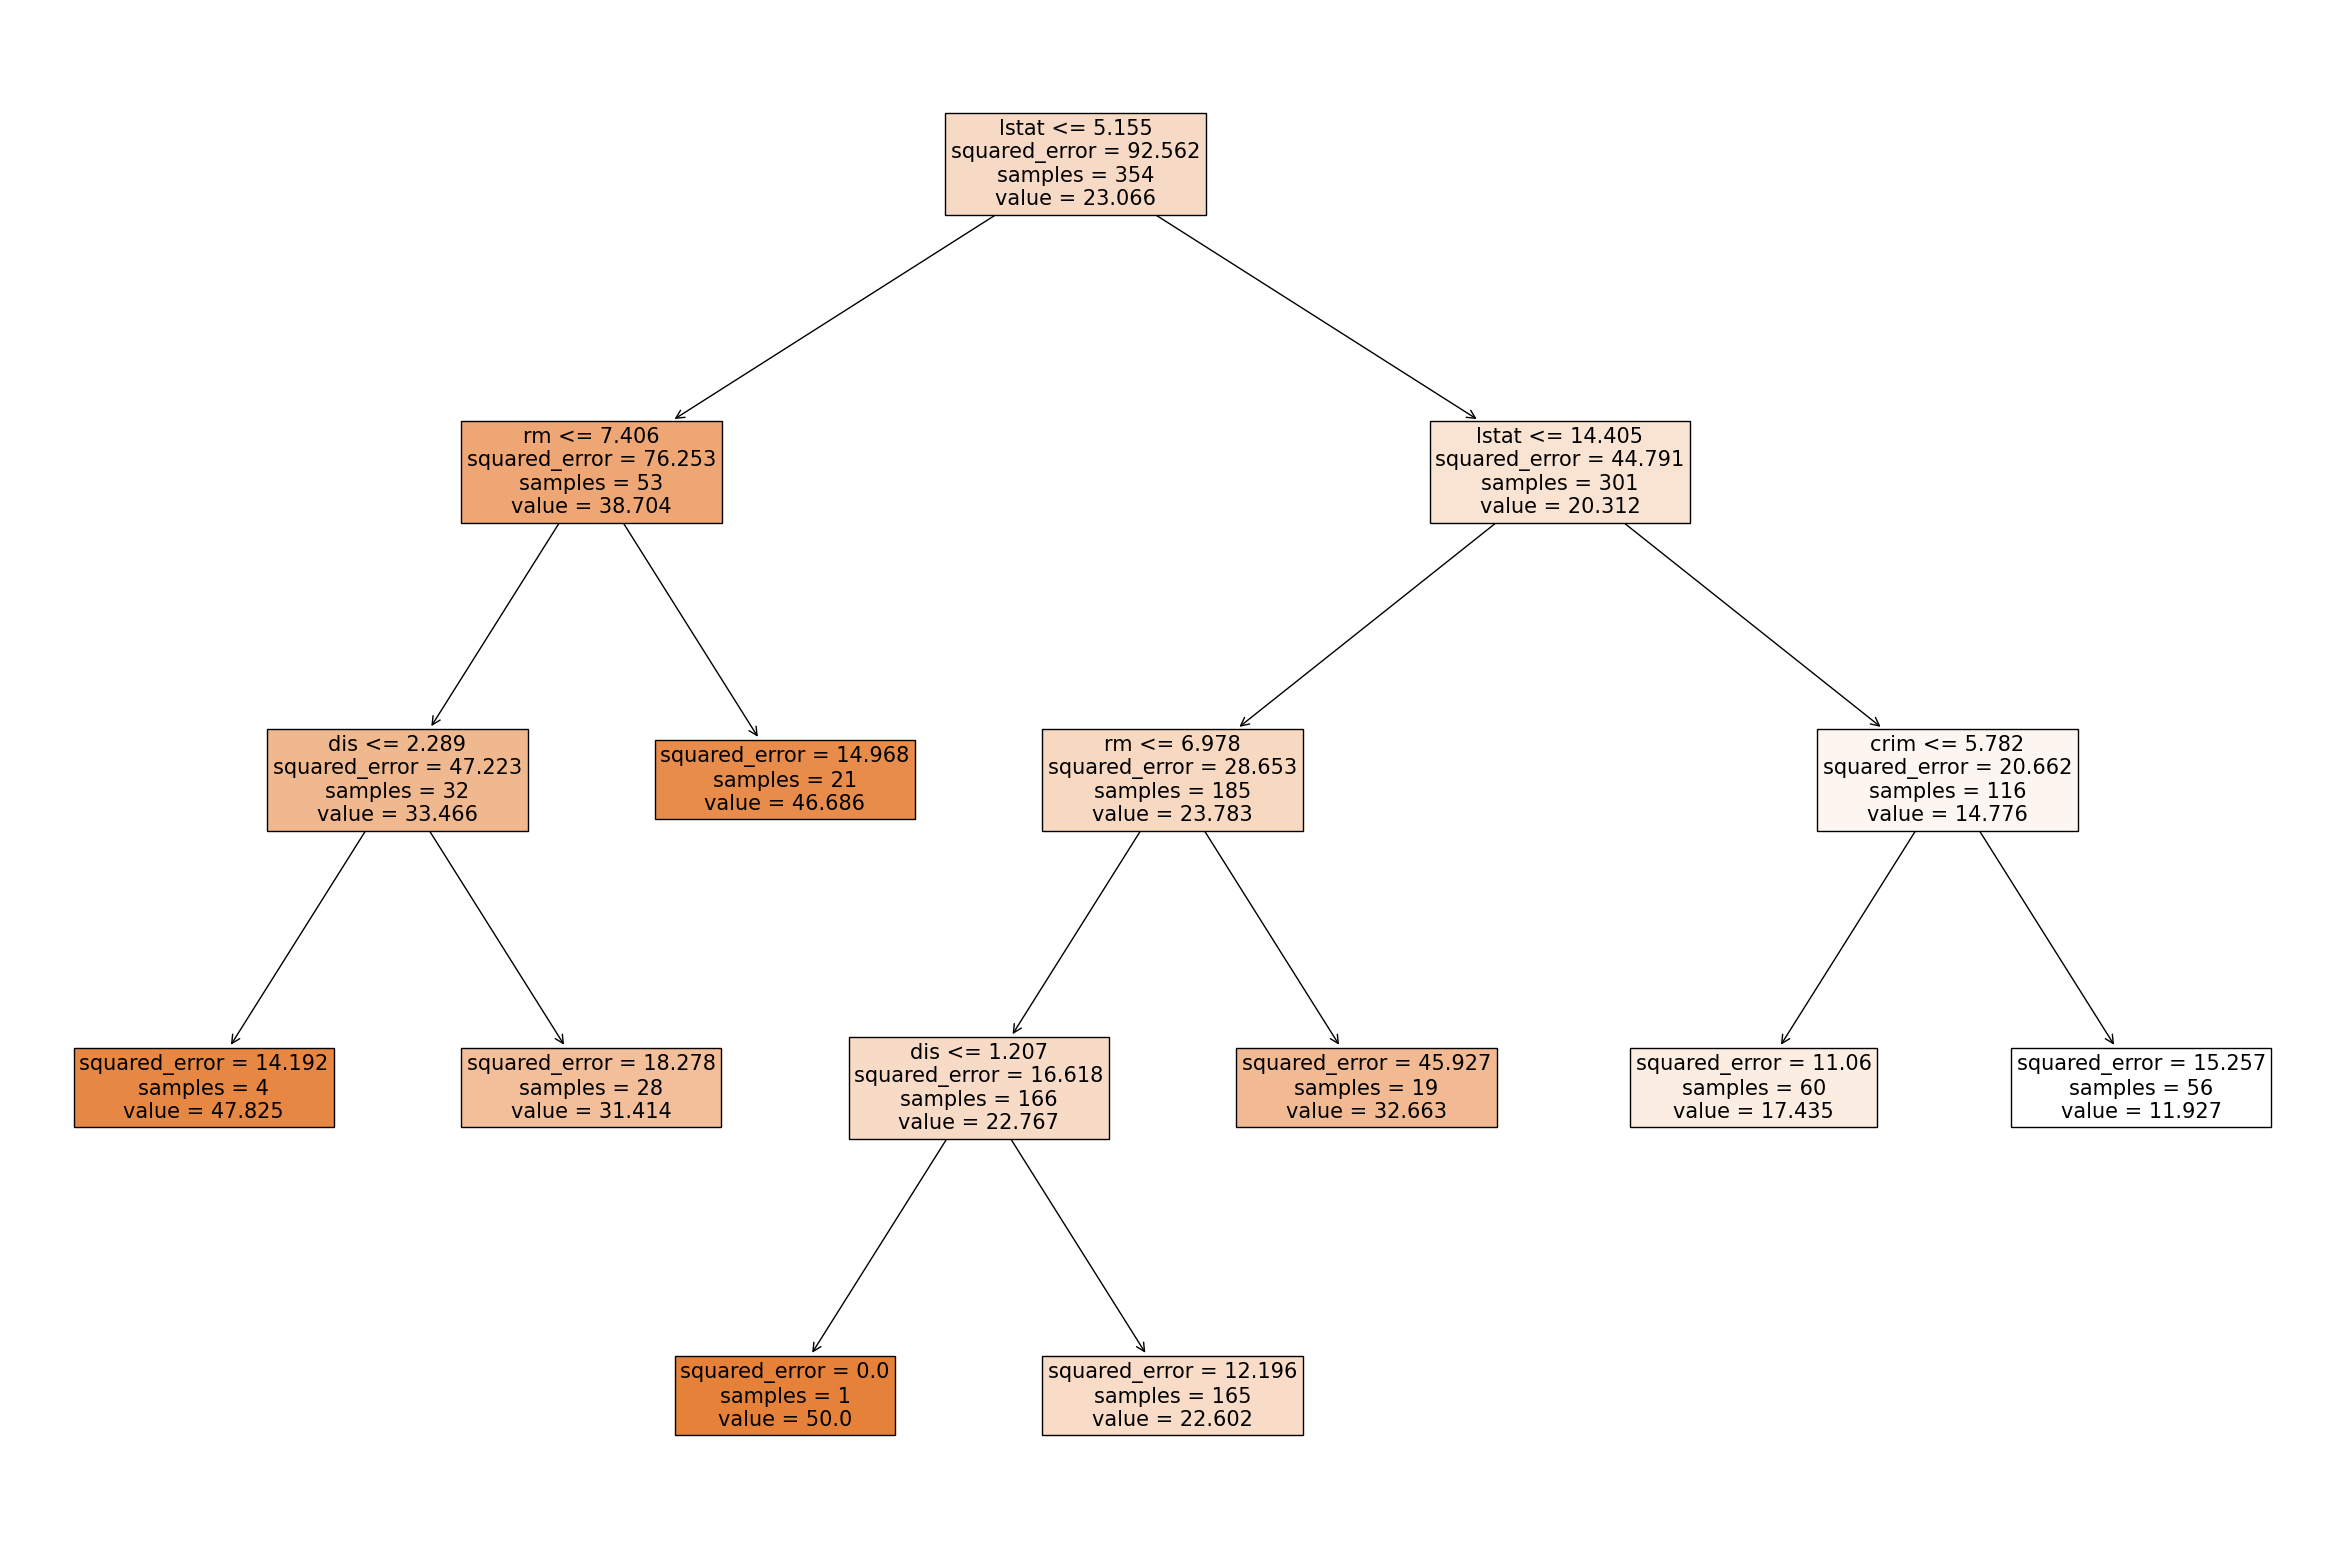

In [19]:
#Visualizando a arvore 

plt.rc('figure', figsize=(30, 20))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,
                    fontsize=15,
                    filled=True) 